In [6]:
import numpy as np
import random
from random import randint
from sklearn.preprocessing import MinMaxScaler

#For consusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


In [2]:
train_labels = []
train_samples = []

for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [16]:
test_labels = []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [7]:
c = list(zip(train_samples, train_labels))
random.shuffle(c)
train_samples, train_labels = zip(*c)

print(train_samples[0:10])
print(train_labels[0:10])

(89, 13, 37, 92, 87, 43, 14, 65, 92, 90)
(1, 0, 0, 1, 1, 0, 0, 1, 1, 1)


In [17]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

print(scaled_train_samples.shape)


(2100, 1)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

print(scaled_test_samples.shape)



(420, 1)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
 ])

model.summary()

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 2s - loss: 0.6645 - acc: 0.5333 - val_loss: 0.6496 - val_acc: 0.5905
Epoch 2/20
 - 0s - loss: 0.6331 - acc: 0.6196 - val_loss: 0.6206 - val_acc: 0.6762
Epoch 3/20
 - 0s - loss: 0.6009 - acc: 0.6942 - val_loss: 0.5892 - val_acc: 0.7095
Epoch 4/20
 - 0s - loss: 0.5668 - acc: 0.7561 - val_loss: 0.5565 - val_acc: 0.7476
Epoch 5/20
 - 0s - loss: 0.5296 - acc: 0.7947 - val_loss: 0.5214 - val_acc: 0.7619
Epoch 6/20
 - 0s - loss: 0.4926 - acc: 0.8291 - val_loss: 0.4882 - val_acc: 0.7952
Epoch 7/20
 - 0s - loss: 0.4580 - acc: 0.8534 - val_loss: 0.4577 - val_acc: 0.8143
Epoch 8/20
 - 0s - loss: 0.4265 - acc: 0.8757 - val_loss: 0.4306 - val_acc: 0.8476
Epoch 9/20
 - 0s - loss: 0.3985 - acc: 0.8852 - val_loss: 0.4074 - val_acc: 0.8714
Epoch 10/20
 - 0s - loss: 0.3748 - acc: 0.8989 - val_loss: 0.3875 - val_acc: 0.8810
Epoch 11/20
 - 0s - loss: 0.3548 - acc: 0.9085 - val_loss: 0.3715 - val_acc: 0.8810
Epoch 12/20
 - 0s - loss: 0.3386 - acc

In [19]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0) 

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[193  17]
 [  9 201]]


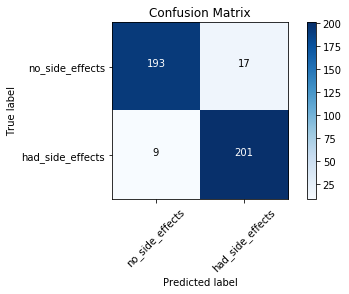

In [23]:
cm = confusion_matrix(test_labels, rounded_predictions)

cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [24]:
model.save('medical_trial_model.h5')

from keras.models import load_model
new_model = load_model('medical_trial_model.h5')


In [25]:
print(new_model.summary())
print(new_model.get_weights())
print(new_model.optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
None
[array([[ 0.36692318, -0.07317501, -0.59216505, -0.13377199,  0.65797716,
         0.5218953 ,  0.4467949 , -0.4909857 , -0.15024012,  0.42521596,
        -0.2724829 ,  0.30628005,  0.68618435, -0.12534034, -0.39107996,
        -0.4271949 ]], dtype=float32), array([-0.0923755 ,  0.16708413,  0.        ,  0.        , -0.10261673,
        0.14038037, -0.09852852,  0.        ,  0.        , -0.1059678 ,
